In [28]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest_tools.portfolio_tools as pt

In [29]:
# Import Strategy Class
from dasr_optimized_long_only_portfolio_strategy_class import dasr_optimized_long_only_portfolio as strategy_class
# from strategy_classes.dasr_optimized_portfolio_strategy.dasr_optimized_portfolio_strategy_class import dasr_optimized_portfolio

Visualize Underlying Strategies

10
['SPY', 'QQQ', 'DBC', 'TLT', 'GLD']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.790
Drift Adjusted Sharpe Ratio                4.507
CAGR                                       0.077
Vol                                        0.100
Sortino Ratio                              0.964
Martin (Ulcer) Ratio                       0.831
Omega Ratio                                1.024
RR Ratio                                   1.179
Win Rate                                   0.545
Skew                                      -0.169
Kurtosis                                  12.979
Max Drawdown                              -0.247
VaR - Laplace                             -0.024
CVaR - Laplace                            -0.031


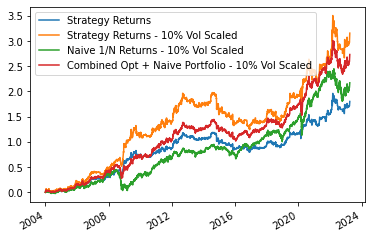

20
['SPY', 'QQQ', 'GLD', 'TLT', 'DBC', 'XLE', 'EEM']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.246
Drift Adjusted Sharpe Ratio                2.976
CAGR                                       0.020
Vol                                        0.100
Sortino Ratio                              0.276
Martin (Ulcer) Ratio                       0.245
Omega Ratio                                0.909
RR Ratio                                   1.056
Win Rate                                   0.540
Skew                                      -0.516
Kurtosis                                  17.839
Max Drawdown                              -0.260
VaR - Laplace                             -0.025
CVaR - Laplace                            -0.032


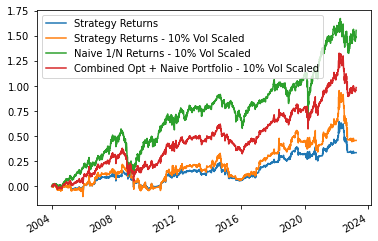

10
['SPY', 'QQQ', 'GLD', 'TLT', 'DBC', 'XLE', 'EEM']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.409
Drift Adjusted Sharpe Ratio                2.684
CAGR                                       0.036
Vol                                        0.100
Sortino Ratio                              0.487
Martin (Ulcer) Ratio                       0.398
Omega Ratio                                0.947
RR Ratio                                   1.088
Win Rate                                   0.538
Skew                                      -0.281
Kurtosis                                  16.629
Max Drawdown                              -0.274
VaR - Laplace                             -0.023
CVaR - Laplace                            -0.029


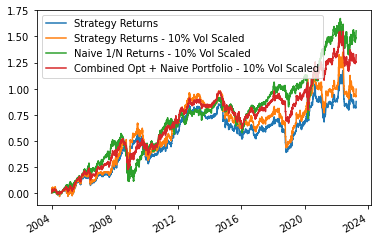

20
['SPY', 'GLD', 'TLT', 'DBC', 'JNK', 'EEM']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.093
Drift Adjusted Sharpe Ratio                0.563
CAGR                                       0.004
Vol                                        0.100
Sortino Ratio                              0.101
Martin (Ulcer) Ratio                       0.073
Omega Ratio                                0.875
RR Ratio                                   1.022
Win Rate                                   0.537
Skew                                      -0.935
Kurtosis                                  26.444
Max Drawdown                              -0.273
VaR - Laplace                             -0.025
CVaR - Laplace                            -0.031


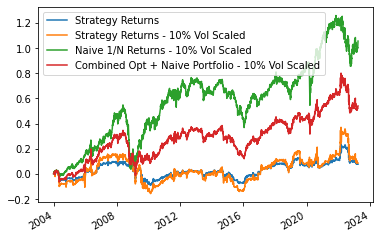

10
['SPY', 'GLD', 'TLT', 'DBC', 'JNK', 'EEM']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.426
Drift Adjusted Sharpe Ratio                2.639
CAGR                                       0.038
Vol                                        0.100
Sortino Ratio                              0.523
Martin (Ulcer) Ratio                       0.506
Omega Ratio                                0.949
RR Ratio                                   1.093
Win Rate                                   0.535
Skew                                      -0.026
Kurtosis                                  14.598
Max Drawdown                              -0.198
VaR - Laplace                             -0.025
CVaR - Laplace                            -0.031


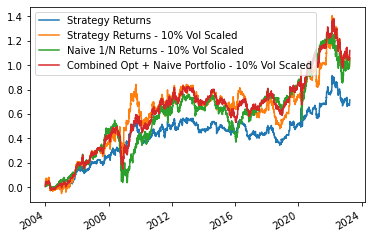

20
['SPY', 'QQQ', 'TLT', 'DBC']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.182
Drift Adjusted Sharpe Ratio                1.844
CAGR                                       0.013
Vol                                        0.100
Sortino Ratio                              0.185
Martin (Ulcer) Ratio                       0.165
Omega Ratio                                0.875
RR Ratio                                   1.051
Win Rate                                   0.544
Skew                                      -0.696
Kurtosis                                  42.048
Max Drawdown                              -0.332
VaR - Laplace                             -0.025
CVaR - Laplace                            -0.032


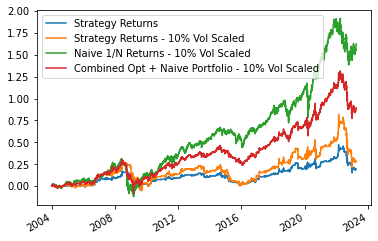

10
['SPY', 'QQQ', 'TLT', 'DBC']
                             Performance Summary
Strategy Returns                                
Sharpe Ratio                               0.601
Drift Adjusted Sharpe Ratio                7.761
CAGR                                       0.057
Vol                                        0.100
Sortino Ratio                              0.706
Martin (Ulcer) Ratio                       1.128
Omega Ratio                                0.983
RR Ratio                                   1.148
Win Rate                                   0.540
Skew                                       0.127
Kurtosis                                  18.193
Max Drawdown                              -0.145
VaR - Laplace                             -0.025
CVaR - Laplace                            -0.031


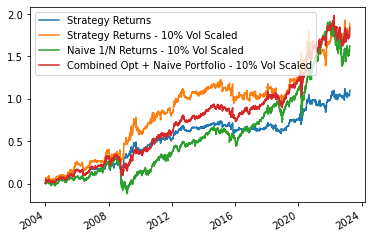

In [104]:
for i in range(0, 7):

    path = fr'C:\Users\marcu\Documents\Quant\Programming\Strategies\Beta Strategies\dasr_optimized_portfolio_long_only_strategy_{i+1}.pickle'
    
    with open(path, 'rb') as handler:
        strategy = pickle.load(handler)
        print(strategy.rebal_freq)
        strategy.performance_analysis()
        print(strategy.strategy_performance_summary)
        plt.show()

# Create Multistrategy Portfolio

Load Underlying Strategy Returns

In [105]:
multistrategy_portfolio = {}

for i in range(0, 7):

    path = fr'C:\Users\marcu\Documents\Quant\Programming\Strategies\Beta Strategies\dasr_optimized_portfolio_long_only_strategy_{i}.pickle'
    
    with open(path, 'rb') as handler:
        strategy = pickle.load(handler)
        multistrategy_portfolio[i] = pt.scale_vol(strategy.strategy_returns)

    i+=1

multistrategy_portfolio = pd.DataFrame(multistrategy_portfolio)

In [106]:
import datetime as dt

# Isolate portfolio returns post-2004
multistrategy_portfolio = multistrategy_portfolio.loc[dt.date(2004, 1, 1):]

Optimize Multistrategy Portfolio

In [109]:
rebal_freq = 20
lookback_window = 20

multistrategy_portfolio_dpo, dpo_w = pt.multistrategy_portfolio_optimization(multistrategy_portfolio=multistrategy_portfolio, rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = 'DPO', max_position_weight=1)
print('DPO 1 DONE')
multistrategy_portfolio_mvo, mvo_w = pt.multistrategy_portfolio_optimization(multistrategy_portfolio=multistrategy_portfolio, rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = 'MVO', vol_target=.01, max_position_weight=1)
print('MVO 1 DONE')

DPO 1 DONE


C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\frame.py:9525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MVO 1 DONE


(                             Performance Summary
 Sharpe Ratio                               0.524
 Drift Adjusted Sharpe Ratio                4.115
 CAGR                                       0.048
 Vol                                        0.100
 Sortino Ratio                              0.597
 Martin (Ulcer) Ratio                       0.498
 Omega Ratio                                0.966
 RR Ratio                                   1.126
 Win Rate                                   0.539
 Skew                                      -0.246
 Kurtosis                                  26.892
 Max Drawdown                              -0.294
 VaR - Laplace                             -0.024
 CVaR - Laplace                            -0.031,
                              Performance Summary
 Sharpe Ratio                               0.321
 Drift Adjusted Sharpe Ratio                1.851
 CAGR                                       0.027
 Vol                                        0.100

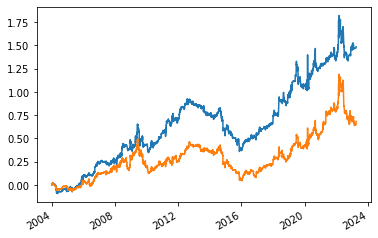

In [110]:
# Plot DPO
pt.cumulative_returns(pt.scale_vol(multistrategy_portfolio_dpo.loc[dt.date(2004, 1, 1):])).plot()
# Plot MVO
pt.cumulative_returns(pt.scale_vol(multistrategy_portfolio_mvo.loc[dt.date(2004, 1, 1):])).plot()

# Print Performance Summaries
pt.performance_summary(pt.scale_vol(multistrategy_portfolio_dpo.loc[dt.date(2004, 1, 1):])), pt.performance_summary(pt.scale_vol(multistrategy_portfolio_mvo.loc[dt.date(2004, 1, 1):]))

DPO & MVO Multistrategy Comparison

(                             Performance Summary
 Sharpe Ratio                               0.461
 Drift Adjusted Sharpe Ratio                2.631
 CAGR                                       0.042
 Vol                                        0.100
 Sortino Ratio                              0.543
 Martin (Ulcer) Ratio                       0.447
 Omega Ratio                                0.955
 RR Ratio                                   1.104
 Win Rate                                   0.542
 Skew                                      -0.087
 Kurtosis                                  26.650
 Max Drawdown                              -0.294
 VaR - Laplace                             -0.025
 CVaR - Laplace                            -0.032,
                              Performance Summary
 Sharpe Ratio                               0.392
 Drift Adjusted Sharpe Ratio                2.220
 CAGR                                       0.034
 Vol                                        0.100

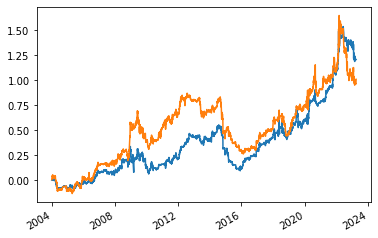

In [56]:
# Plot DPO
pt.cumulative_returns(pt.scale_vol(multistrategy_portfolio_dpo.loc[dt.date(2004, 1, 1):])).plot()
# Plot MVO
pt.cumulative_returns(pt.scale_vol(multistrategy_portfolio_mvo.loc[dt.date(2004, 1, 1):])).plot()

# Print Performance Summaries
pt.performance_summary(pt.scale_vol(multistrategy_portfolio_dpo.loc[dt.date(2004, 1, 1):])), pt.performance_summary(pt.scale_vol(multistrategy_portfolio_mvo.loc[dt.date(2004, 1, 1):]))

1/N Performance

<AxesSubplot:>

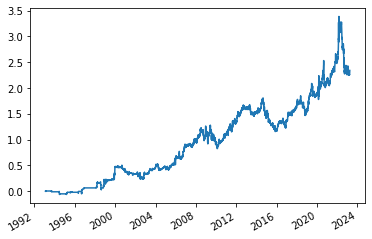

In [49]:
pt.cumulative_returns(pt.scale_vol((multistrategy_portfolio / len(multistrategy_portfolio.columns)).sum(1))).plot()

Rebalance Timing Luck Function

In [88]:
def rebal_timing_luck_multistrategy_test(multistrategy_portfolio: pd.DataFrame, rebal_freq: int, lookback_window: int, optimization = 'DPO', increment=3):
    """ Conduct rebalancing timing luck robustness tests. Increment rebalancing day by "increment" for each optimization. This generates ample sample size across different rebal
        times of the month. 

    Args:
        multistrategy_portfolio (pd.DataFrame): _description_
        rebal_freq (int): _description_
        lookback_window (int): _description_
        optimization (str, optional): _description_. Defaults to 'DPO'.
        increment (int, optional): _description_. Defaults to 3.

    Returns:
        (pd.DataFrame, pd.DataFrame): (rebal-day agnositc multistrategy returns, average multistrategy performance summary)
    """
    
    multistrategy_returns = {}
    multistrategy_weights = {}

    # Run optimizations with varying rebal days

    if optimization == 'DPO':
    
        for i in np.arange(20)[::increment]:
            multistrategy_returns[f'{i} Day Shift'], multistrategy_weights[f'{i} Day Shift'] = pt.multistrategy_portfolio_optimization(multistrategy_portfolio=multistrategy_portfolio.shift(i), rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = optimization, max_position_weight=1)

    elif optimization == 'MVO':
        for i in np.arange(20)[::increment]:
            multistrategy_returns[f'{i} Day Shift'], multistrategy_weights[f'{i} Day Shift'] = pt.multistrategy_portfolio_optimization(multistrategy_portfolio=multistrategy_portfolio.shift(i), rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = optimization, vol_target=.01, max_position_weight=1)
    
    # Transform hash table to pd.DataFrame
    multistrategy_returns = pd.DataFrame(multistrategy_returns)

    # Compute average multistrategy performance across all rebal days
    timing_luck_performance_summary = pd.DataFrame()

    for i, rets in multistrategy_returns.items():

        timing_luck_performance_summary = pd.concat([pt.performance_summary(rets), timing_luck_performance_summary], axis=1)

    # Average performance metrics
    timing_luck_performance_summary.mean(axis=1)

    return multistrategy_returns, timing_luck_performance_summary

Conduct Rebalance Timing Luck on DPO

In [89]:
dpo_rebal_timing_test = rebal_timing_luck_multistrategy_test(multistrategy_portfolio=multistrategy_portfolio, rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = 'DPO', increment=3)

<AxesSubplot:>

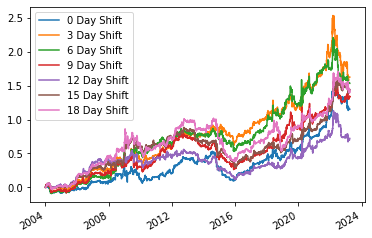

In [78]:
pt.cumulative_returns(dpo_rebal_timing_test.loc[dt.date(2004, 1, 1):]).plot()

Compute average performance across rebal timings DPO

In [79]:
dpo_rebal_timing_test_performance_summary = pd.DataFrame()

for i, rets in dpo_rebal_timing_test.items():

    dpo_rebal_timing_test_performance_summary = pd.concat([pt.performance_summary(rets), dpo_rebal_timing_test_performance_summary], axis=1)

# Get average performance metric across rebal timings
dpo_rebal_timing_test_performance_summary.mean(axis=1)

Sharpe Ratio                    0.471571
Drift Adjusted Sharpe Ratio     3.449286
CAGR                            0.038429
Vol                             0.088000
Sortino Ratio                   0.525429
Martin (Ulcer) Ratio            0.490429
Omega Ratio                     0.926000
RR Ratio                        1.132571
Win Rate                        0.540143
Skew                            0.250857
Kurtosis                       37.675571
Max Drawdown                   -0.283857
VaR - Laplace                  -0.021286
CVaR - Laplace                 -0.027143
dtype: float64

Conduct Rebalance Timing Luck on MVO

C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\frame.py:9525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<AxesSubplot:>

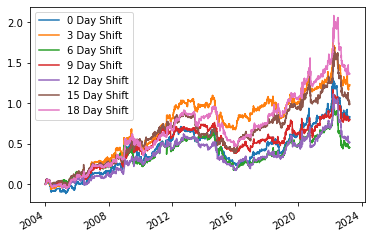

In [85]:
mvo_rebal_timing_test = rebal_timing_luck_multistrategy_test(multistrategy_portfolio=multistrategy_portfolio, rebal_freq=rebal_freq, lookback_window=lookback_window, optimization = 'MVO', increment=3)   
pt.cumulative_returns(mvo_rebal_timing_test.loc[dt.date(2004, 1, 1):]).plot() 

Compute average performance across rebal timings for MVO

In [87]:
mvo_rebal_timing_test_performance_summary = pd.DataFrame()

for i, rets in mvo_rebal_timing_test.items():

    mvo_rebal_timing_test_performance_summary = pd.concat([pt.performance_summary(rets), mvo_rebal_timing_test_performance_summary], axis=1)

# Get average performance metric across rebal timings
mvo_rebal_timing_test_performance_summary.mean(axis=1)

Sharpe Ratio                    0.356714
Drift Adjusted Sharpe Ratio     3.710429
CAGR                            0.027143
Vol                             0.085286
Sortino Ratio                   0.394857
Martin (Ulcer) Ratio            0.332143
Omega Ratio                     0.900000
RR Ratio                        1.092000
Win Rate                        0.539857
Skew                           -0.355714
Kurtosis                       26.800857
Max Drawdown                   -0.261571
VaR - Laplace                  -0.020571
CVaR - Laplace                 -0.025857
dtype: float64